In [43]:
import anndata
from pathlib import Path
import muon as mu
import numpy as np
import scanpy as sc
import scirpy as ir
import seaborn as sns
from matplotlib import cm as mpl_cm
from matplotlib import pyplot as plt

## Load and filter data

In [44]:
def geneSearch(gene):
    genes = adata.var.index
    isGene = genes.str.startswith(gene)
    print(genes[isGene])

adata37 = sc.read_h5ad('../data/processed/BRI-2937.h5ad')
adata39 = sc.read_h5ad('../data/processed/BRI-2939.h5ad')
adata41 = sc.read_h5ad('../data/processed/BRI-2941.h5ad')

adata37.obs['condition'] = '2937'
adata39.obs['condition'] = '2939'
adata41.obs['condition'] = '2941'

adata = anndata.concat([adata37, adata39, adata41])

adata37 = sc.read_h5ad('../data/processed/BRI-2937_tcr.h5ad')
adata39 = sc.read_h5ad('../data/processed/BRI-2939_tcr.h5ad')
adata41 = sc.read_h5ad('../data/processed/BRI-2941_tcr.h5ad')

adata37.obs['condition'] = '2937'
adata39.obs['condition'] = '2939'
adata41.obs['condition'] = '2941'

adata_tcr = anndata.concat([adata37, adata39, adata41])

/data/trm-sc-analysis/.pixi/envs/default/lib/python3.12/site-packages/anndata/_core/anndata.py:1806: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/data/trm-sc-analysis/.pixi/envs/default/lib/python3.12/site-packages/anndata/_core/anndata.py:1806: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [45]:
sc.pp.filter_genes(adata, min_cells=10)
sc.pp.filter_cells(adata, min_genes=100)
sc.pp.normalize_per_cell(adata)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, flavor="cell_ranger", n_top_genes=5000)
sc.tl.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

/data/trm-sc-analysis/.pixi/envs/default/lib/python3.12/site-packages/anndata/_core/anndata.py:1806: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/data/trm-sc-analysis/.pixi/envs/default/lib/python3.12/site-packages/anndata/_core/anndata.py:1806: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/tmp/ipykernel_2705377/2605311196.py:3: FutureWarning: Use sc.pp.normalize_total instead
  sc.pp.normalize_per_cell(adata)
/data/trm-sc-analysis/.pixi/envs/default/lib/python3.12/site-packages/anndata/_core/anndata.py:1806: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/data/trm-sc-analysis/.pixi/envs/default/lib/python3.12/site-packages/scanpy/preprocessing/_simple.py:590: FutureWarning: Use sc.pp.normalize_total instead
  normaliz

In [46]:
cellTypesT = ['NK cells',
'CD16- NK cells',
'Cycling NK cells',
'gamma-delta T cells',
'ILC3',
'Double-positive thymocytes',
'Tem/Trm cytotoxic T cells',
'Regulatory T cells']
adataT = adata[adata.obs['majority_voting_low'].isin(cellTypesT)]
adataT.obs['Cd8Pos'] =   (adataT[:,'Cd8a'].X>0.2).todense()
adataT = adata[adata.obs['majority_voting_low'].isin(cellTypesT)]
sc.pp.normalize_per_cell(adataT)
sc.pp.log1p(adataT)
sc.pp.pca(adataT, svd_solver="arpack", use_highly_variable=True)
sc.tl.umap(adataT)

/tmp/ipykernel_2705377/2433470464.py:10: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adataT.obs['Cd8Pos'] =   (adataT[:,'Cd8a'].X>0.2).todense()
/data/trm-sc-analysis/.pixi/envs/default/lib/python3.12/site-packages/anndata/_core/anndata.py:1806: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/data/trm-sc-analysis/.pixi/envs/default/lib/python3.12/site-packages/anndata/_core/anndata.py:1806: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/tmp/ipykernel_2705377/2433470464.py:12: FutureWarning: Use sc.pp.normalize_total instead
  sc.pp.normalize_per_cell(adataT)
/data/trm-sc-analysis/.pixi/envs/default/lib/python3.12/site-packages/scanpy/preprocessing/_simple.py:587: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view 

/data/trm-sc-analysis/.pixi/envs/default/lib/python3.12/site-packages/scanpy/preprocessing/_simple.py:590: FutureWarning: Use sc.pp.normalize_total instead
  normalize_per_cell(
/data/trm-sc-analysis/.pixi/envs/default/lib/python3.12/site-packages/scanpy/preprocessing/_pca/__init__.py:226: FutureWarning: Argument `use_highly_variable` is deprecated, consider using the mask argument. Use_highly_variable=True can be called through mask_var="highly_variable". Use_highly_variable=False can be called through mask_var=None
  mask_var_param, mask_var = _handle_mask_var(


In [47]:
adataT.obs['Cd8Pos'] =   (adataT[:,'Cd8a'].X>0.2).todense()
adataCd8 = adataT[adataT.obs['Cd8Pos']]
sc.pp.normalize_per_cell(adataCd8)
sc.pp.log1p(adataCd8)
sc.pp.highly_variable_genes(adataCd8, flavor="cell_ranger", n_top_genes=5000)
sc.tl.pca(adataCd8)
sc.pp.neighbors(adataCd8)
sc.tl.umap(adataCd8)

/tmp/ipykernel_2705377/1339037053.py:3: FutureWarning: Use sc.pp.normalize_total instead
  sc.pp.normalize_per_cell(adataCd8)
/data/trm-sc-analysis/.pixi/envs/default/lib/python3.12/site-packages/scanpy/preprocessing/_simple.py:587: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[key_n_counts] = counts_per_cell
/data/trm-sc-analysis/.pixi/envs/default/lib/python3.12/site-packages/anndata/_core/anndata.py:1806: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


/data/trm-sc-analysis/.pixi/envs/default/lib/python3.12/site-packages/scanpy/preprocessing/_simple.py:590: FutureWarning: Use sc.pp.normalize_total instead
  normalize_per_cell(


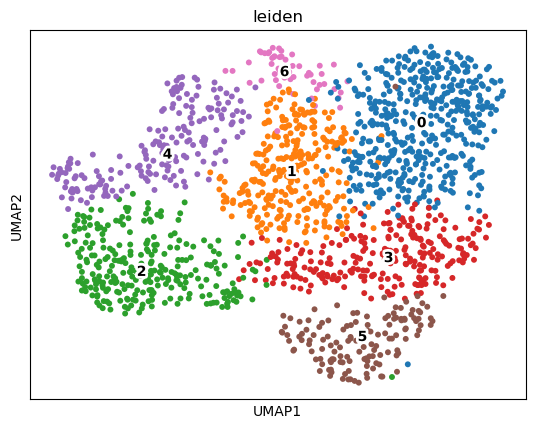

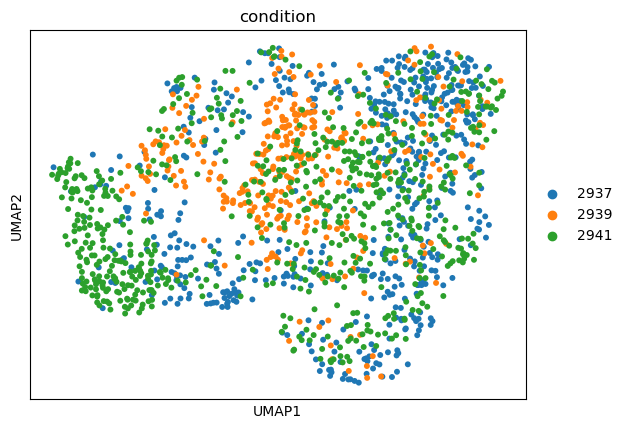

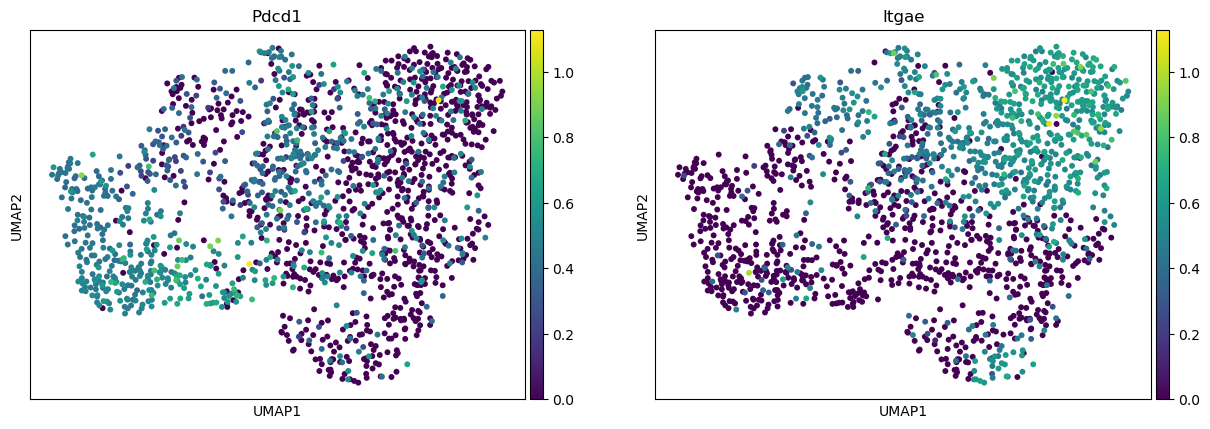

In [48]:
sc.tl.leiden(adataCd8, resolution=.5, random_state=1234)
sc.pl.umap(adataCd8, color='leiden',add_outline=False,legend_loc="on data", legend_fontoutline=4)
sc.pl.umap(adataCd8, color='condition')
sc.pl.umap(adataCd8, color=['Pdcd1', 'Itgae'], wspace=0.15)

This clustering seems to work well. Cluster 2 corresponds well to an exhausted state, cluster 0 and 6 for TRMs, and 4 actually seems to be a transitionary cluster. Cluster 1, 3, and 5 seem to be more challenging so we'll look at their top genes. 

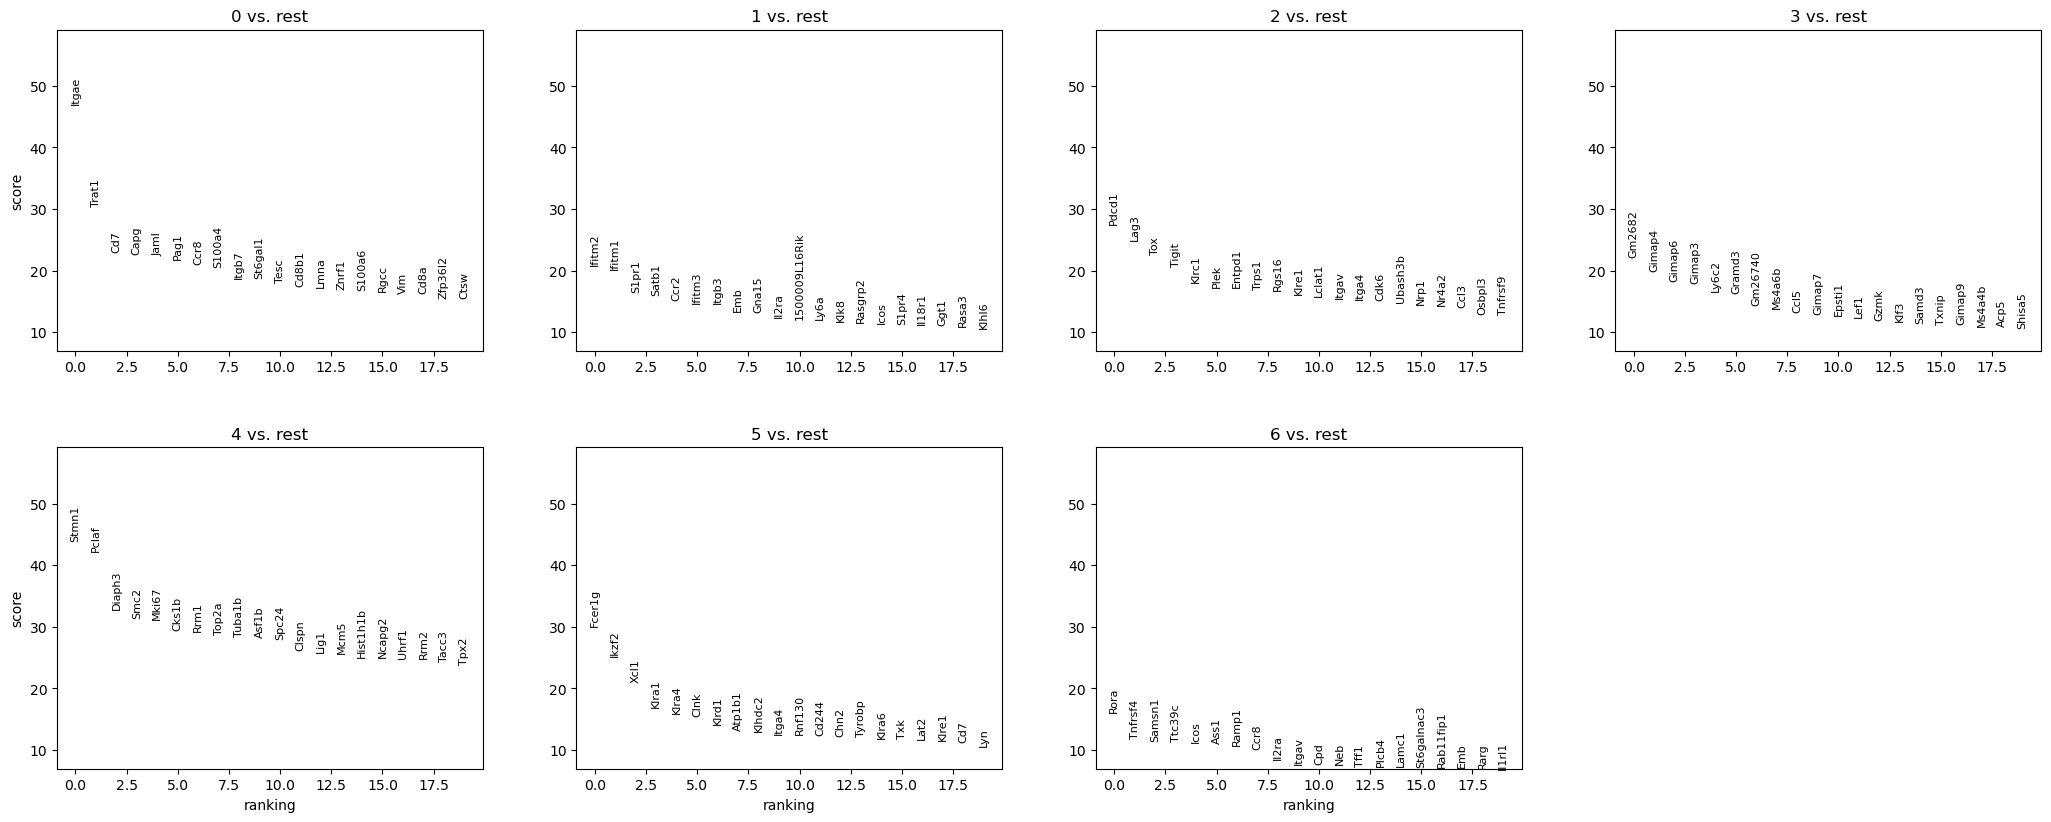

In [49]:
sc.tl.rank_genes_groups(adataCd8, groupby='leiden')
sc.pl.rank_genes_groups(adataCd8, groupby='leiden')

# TCR Sequencing Analysis

In [50]:
adata_tcr.obs_names_make_unique()
adataCd8.obs_names_make_unique()
mdata = mu.MuData({"gex": adataCd8, "airr": adata_tcr})

ir.pp.index_chains(mdata)
ir.tl.chain_qc(mdata)
ir.pp.ir_dist(mdata)
ir.tl.define_clonotypes(mdata, receptor_arms="all", dual_ir="primary_only")
ir.pp.ir_dist(
    mdata,
    metric="tcrdist",
    sequence="aa",
    cutoff=15,
)
ir.tl.define_clonotype_clusters(mdata, sequence="aa", metric="tcrdist", receptor_arms="all", dual_ir="any")
ir.tl.clonotype_network(mdata, min_cells=3, sequence="aa", metric="tcrdist")
ir.tl.clonal_expansion(mdata)

/data/trm-sc-analysis/.pixi/envs/default/lib/python3.12/site-packages/mudata/_core/mudata.py:1598: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("var", axis=0, join_common=join_common)
/data/trm-sc-analysis/.pixi/envs/default/lib/python3.12/site-packages/mudata/_core/mudata.py:1461: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("obs", axis=1, join_common=join_common)


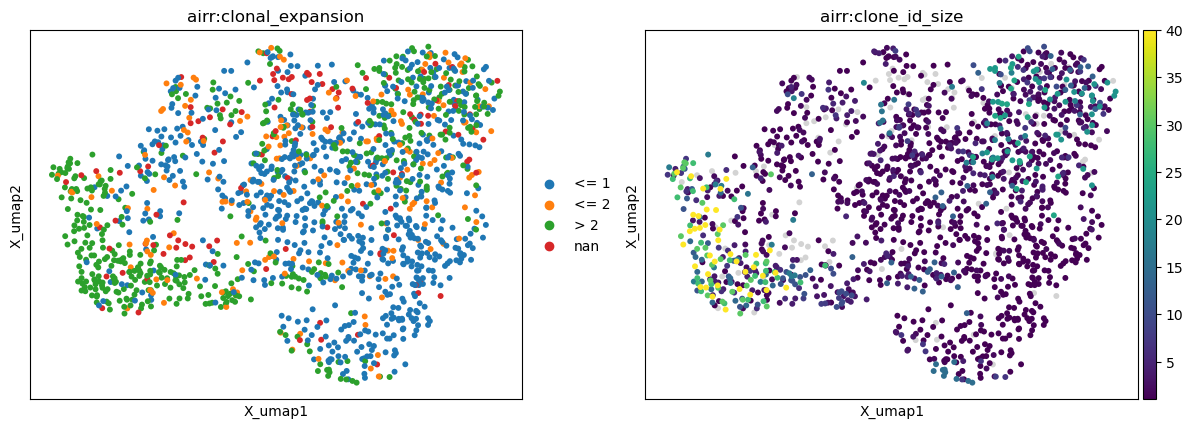

In [51]:
mu.pl.embedding(mdata, basis="gex:umap", color=["airr:clonal_expansion", "airr:clone_id_size"])

/data/trm-sc-analysis/.pixi/envs/default/lib/python3.12/site-packages/scirpy/pl/_clonotypes.py:179: FutureWarning: Use obsm (e.g. `k in adata.obsm` or `adata.obsm.keys() | {'u'}`) instead of AnnData.obsm_keys, AnnData.obsm_keys is deprecated and will be removed in the future.
  if f"X_{basis}" not in params.adata.obsm_keys():


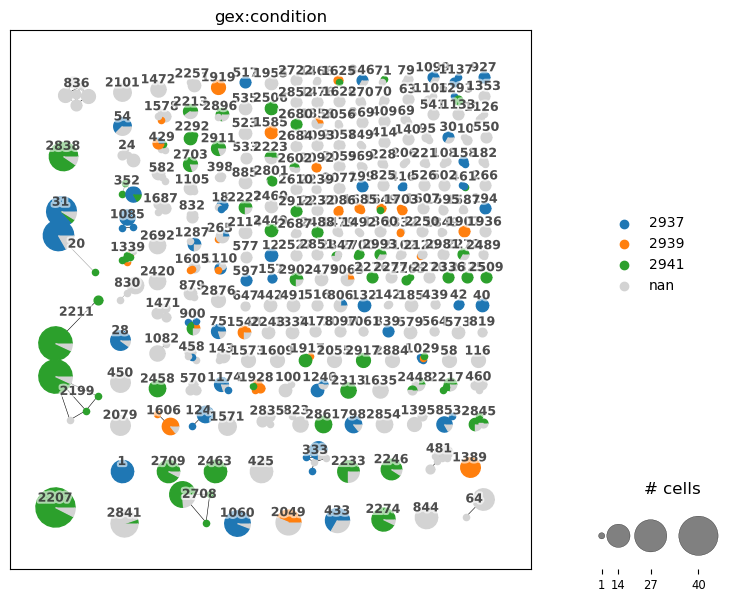

In [52]:
_ = ir.pl.clonotype_network(mdata, color="gex:condition", label_fontsize=9, panel_size=(7, 7), base_size=20)

/tmp/ipykernel_2705377/2856587330.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("clone_id")["sample"]


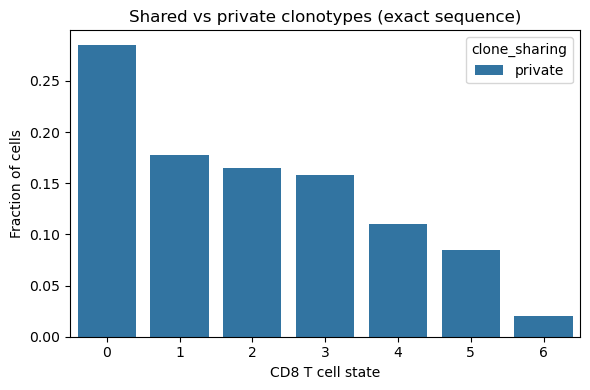

In [55]:
# chatgpt code- fix later

airr = mdata.mod["airr"]
gex = mdata.mod["gex"]

common_cells = airr.obs_names.intersection(gex.obs_names)

airr = airr[common_cells].copy()
mdata.mod["airr"] = airr

airr.obs["sample"] = gex.obs.loc[airr.obs_names, "condition"]
airr.obs["phenotype"] = gex.obs.loc[airr.obs_names, "leiden"]

import pandas as pd

# copy sample + phenotype into airr.obs for convenience
mdata.mod["airr"].obs["sample"] = mdata.mod["gex"].obs.loc[
    mdata.mod["airr"].obs_names, "condition"
]

mdata.mod["airr"].obs["phenotype"] = mdata.mod["gex"].obs.loc[
    mdata.mod["airr"].obs_names, "leiden"
]

airr = mdata.mod["airr"]

# how many samples each clonotype appears in
clone_sample_counts = (
    airr.obs
    .groupby("clone_id")["sample"]
    .nunique()
)

# map back to cells
airr.obs["clone_n_samples"] = airr.obs["clone_id"].map(clone_sample_counts)

# shared vs private label
airr.obs["clone_sharing"] = airr.obs["clone_n_samples"].apply(
    lambda x: "shared" if x > 1 else "private"
)

import seaborn as sns
import matplotlib.pyplot as plt

df = airr.obs[["phenotype", "clone_sharing"]]

cell_frac = (
    df
    .value_counts(normalize=True)
    .rename("fraction")
    .reset_index()
)

plt.figure(figsize=(6,4))
sns.barplot(
    data=cell_frac,
    x="phenotype",
    y="fraction",
    hue="clone_sharing"
)
plt.ylabel("Fraction of cells")
plt.xlabel("CD8 T cell state")
plt.title("Shared vs private clonotypes (exact sequence)")
plt.tight_layout()


## Vegf/Eosinophil Detour

In [27]:
geneSearch('Vegf')

Index(['Vegfd', 'Vegfc', 'Vegfa', 'Vegfb'], dtype='object')


In [34]:
sc.tl.leiden(adata, resolution=0.05, random_state=1234)
# sc.pl.umap(adata, color='leiden')

adata.obs['celltype_fine'] = adata.obs['majority_voting_low'].astype(str)
adata.obs['celltype_broad'] = adata.obs['majority_voting_high'].astype(str)

isEo = adata.obs['leiden'].astype(str) == '2'
adata.obs.loc[isEo, 'celltype_fine'] = 'Eosinophil'
adata.obs.loc[isEo, 'celltype_broad'] = 'Eosinophil'

/data/trm-sc-analysis/.pixi/envs/default/lib/python3.12/site-packages/anndata/_core/anndata.py:1190: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/data/trm-sc-analysis/.pixi/envs/default/lib/python3.12/site-packages/anndata/_core/anndata.py:1806: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/data/trm-sc-analysis/.pixi/envs/default/lib/python3.12/site-packages/anndata/_core/anndata.py:1190: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/data/trm-sc-analysis/.pixi/envs/default/lib/python3.12/site-packages/anndata/_core/anndata.py:1806: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


Text(0.5, 1.0, 'Eosinophil Vegfa Expression')

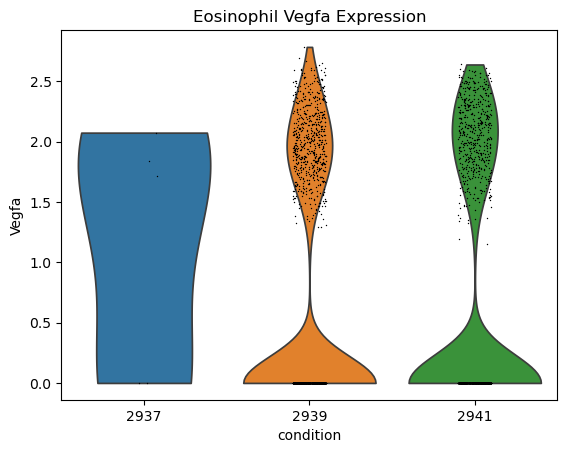

In [36]:
fig, ax = plt.subplots()
sc.pl.violin(adata[adata.obs['celltype_broad'] == 'Eosinophil'], keys='Vegfa', groupby='condition', ax=ax, show=False)
ax.set_title('Eosinophil Vegfa Expression')
